In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gp

wi = gp.GeoDataFrame.from_file('./data/shape/Wards_111312.shp')
elec_dat = pd.read_csv('./data/wi_2014_heda.csv')

wi['vrat'] = elec_dat['g2014_SOS_rv']
wi['vdat'] = elec_dat['g2014_SOS_dv']
wi['mr'] = (wi['vdat'] - wi['vrat']) / ((wi['vdat'] + wi['vrat']))
wi['mr'] = wi['mr'].fillna(0)

# wi.plot(column = 'mr', cmap='OrRd')
# plt.savefig('marginmap.png')

# import geoplot
# geoplot.polyplot(wi)
# plt.savefig('geoplotted.png')

In [13]:
tot = sum(wi['PERSONS'])
target = tot / 8
print(target)

710873.25


In [14]:
c = 0
wi["NEIGHBORS"] = None  # add NEIGHBORS column
for index, prec in wi.iterrows():
    if c == 10:
        break
    neighbors = wi[wi.geometry.touches(prec.geometry)]['GEOID10'].tolist() 
    wi.at[index, "NEIGHBORS"] = neighbors
    c += 1

In [15]:
pltrp = wi.copy()
pltrp['isadj'] = None
for i in range(len(pltrp['GEOID10'])):
    pltrp['isadj'][i] = pltrp['GEOID10'][i] in pltrp['NEIGHBORS'][0]

/home/rtse/anaconda3/envs/gerry/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


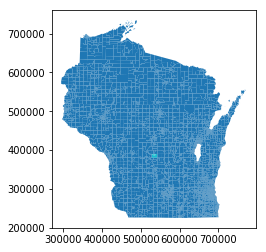

In [16]:
pltrp['isadj'] = pltrp['isadj'] * 1000
pltrp.plot(column = 'isadj')
plt.savefig('adj.png', dpi = 1000)